# Figure 5


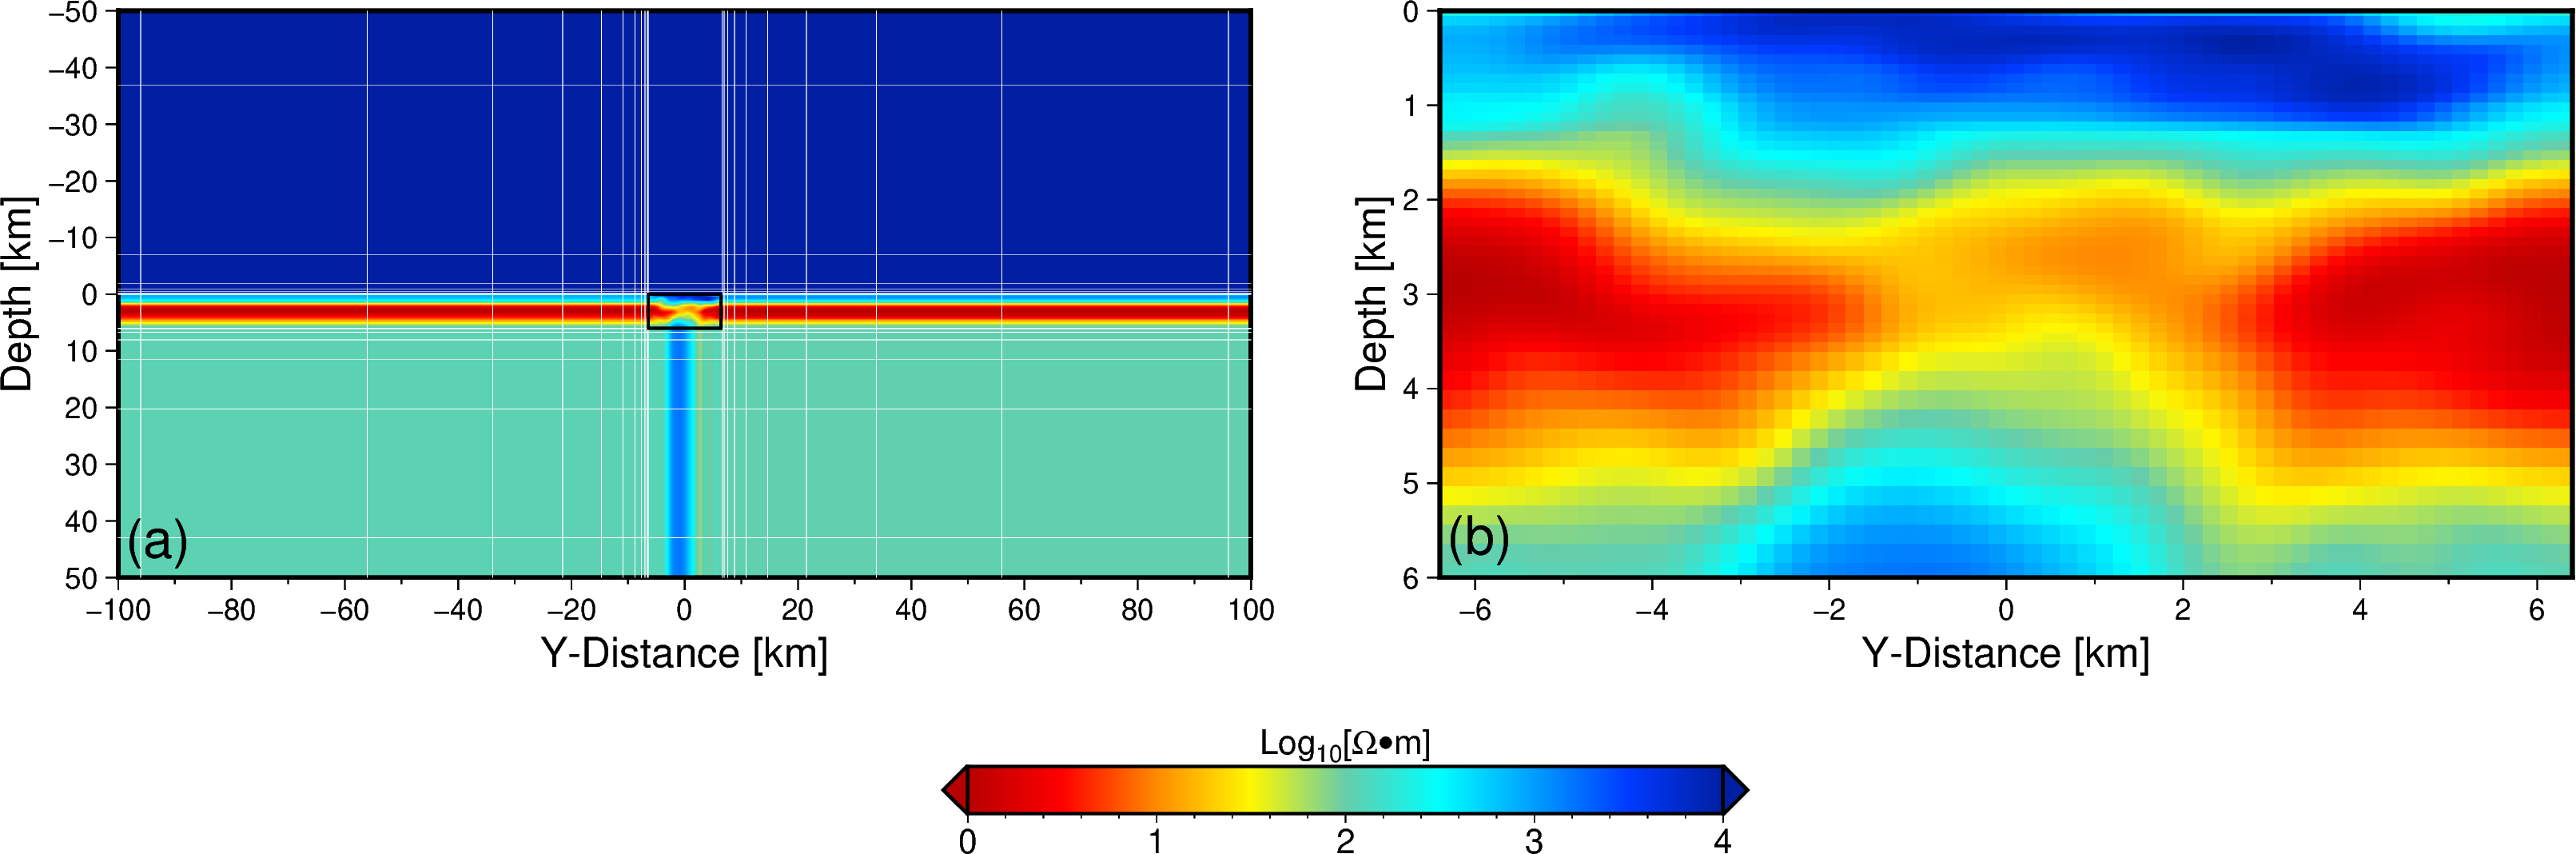

In [3]:
import pygmt

def preset1():
    # Convert range units to kilometers
    ymin, ymax, zmin, zmax = -100, 100, -50, 50  # Assuming these values are already in kilometers
    return ymin, ymax, zmin, zmax

def preset2():
    # Convert range units to kilometers
    ymin, ymax, zmin, zmax = -6.4, 6.4, 0, 6  # Again, assuming these values are already in kilometers
    return ymin, ymax, zmin, zmax

# Set file and directory paths
dir_path = "./Figure5/"
cpt_file_in = f"{dir_path}thermal.cpt"
cpt_file_out = f"{dir_path}rbow.cpt"
result1_grid = f"{dir_path}result1.grd"
result2_grid = f"{dir_path}result2.grd"
out_pdf_png = f"{dir_path}Figure5_py"

# Set range by calling functions
ymin, ymax, zmin, zmax = preset1()
range_yz1 = f"{ymin}/{ymax}/{zmin}/{zmax}"

pygmt.config(FONT_ANNOT_PRIMARY="12p", FONT_LABEL="14p", MAP_FRAME_PEN="1p,black")

fig = pygmt.Figure()
pygmt.makecpt(cmap=cpt_file_in, series="0/4.0/0.01", continuous=True, output=cpt_file_out)

# Convert grid range using grdedit in original GMT, currently, PyGMT does not support grdedit and grdconvert modules
# gmt grdedit wholeRangeGrids.grd -R-100/100/-50/50 -Gresult1.grd

fig.grdimage(grid=result1_grid, region=range_yz1, projection="X12c/-6c", cmap=cpt_file_out, frame=["xa20f10+lY-Distance [km]", "ya10f10+lDepth [km]", "WStr"])
fig.plot(data=f"{dir_path}line_y.txt", pen="faint,white")
fig.plot(data=f"{dir_path}line_z.txt", pen="faint,white")
fig.plot(data=[[-6.4, 0], [-6.4, 6.0], [6.4, 6.0], [6.4, 0], [-6.4, 0]], pen="0.8p")
fig.text(x=-93, y=43, text="(a)", font="16p,Helvetica")

ymin, ymax, zmin, zmax = preset2()
range_yz2 = f"{ymin}/{ymax}/{zmin}/{zmax}"

# Convert grid range using grdedit in original GMT, currently, PyGMT does not support grdedit and grdconvert modules
# gmt grdedit coreRangeGrids.grd -R-6.4/6.4/0/6 -Gresult2.grd

fig.shift_origin(xshift="14c")
fig.grdimage(grid=result2_grid, region=range_yz2, projection="X12c/-6c", cmap=cpt_file_out, frame=["xa2f1+lY-Distance [km]", "ya1f1+lDepth [km]", "WStr"])
fig.text(x=-5.95, y=5.55, text="(b)", font="16p,Helvetica")

pygmt.config(FONT_ANNOT_PRIMARY="14p", FONT_LABEL="14p")
fig.colorbar(cmap=cpt_file_out, frame=["xaf+lLog@-10@-[@~W\267@~m]", "y"], position="jTC+w8c/0.5c+o-7.0c/8.0c+ml+e")

# Save in PDF and PNG formats
fig.savefig(f"{out_pdf_png}.pdf")
fig.savefig(f"{out_pdf_png}.png")

# Display the figure in jupyter notebook
fig.show()

# Figure 6

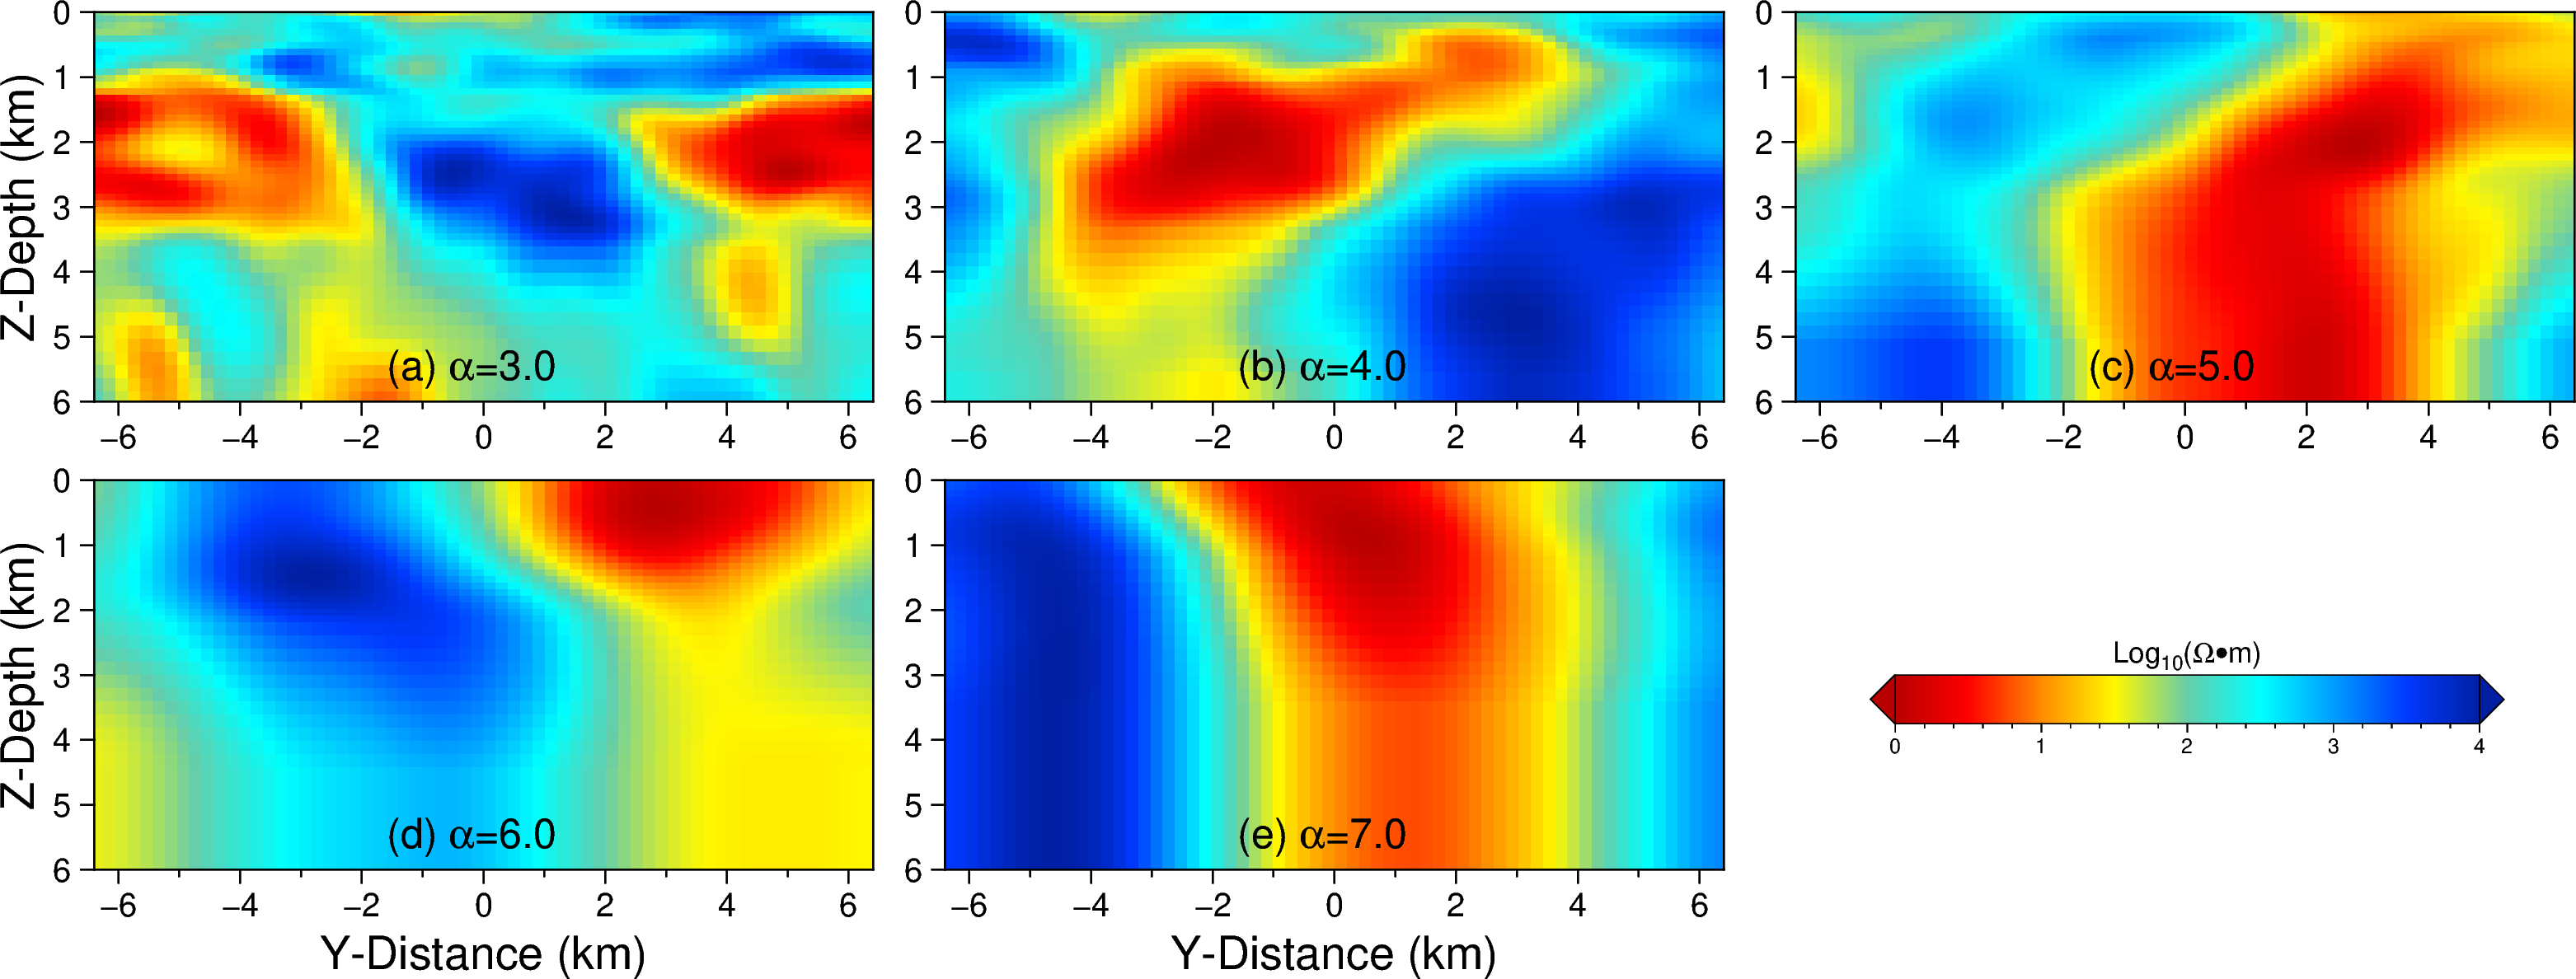

In [4]:
import pygmt

# Set file and directory paths
dir_path = "./Figure6/"
cpt_file_in = f"{dir_path}thermal.cpt"
cpt_file_out = f"{dir_path}rbow.cpt"
alpha_grids = [f"{dir_path}alpha_{i}_1.grd" for i in range(1, 6)]  
out_pdf_png = f"{dir_path}Figure6_py"

# set initial range
xmin, xmax, ymin, ymax, scale = -6400, 6400, 0, 6000, 1000
xmin, xmax = xmin / scale, xmax / scale
ymin, ymax = ymin / scale, ymax / scale
range_xy = f"{xmin}/{xmax}/{ymin}/{ymax}"

# Create a color palette
pygmt.makecpt(cmap=cpt_file_in, series="0/4.0/0.1", continuous=True, output=cpt_file_out)

# Convert grid range using grdedit in original GMT, currently, PyGMT does not support the `grdedit` and `grdconvert` modules
# gmt grdedit alpha_{i}.grd -R-6.4/6.4/0/6 -Galpha_{i}_1.grd

# Create a figure with 2 rows and 3 columns subplots
fig = pygmt.Figure()
pygmt.config(MAP_FRAME_PEN="0.5p")
with fig.subplot(nrows=2, ncols=3, figsize=("24c", "8c"), frame="WSne", margins=["0.8c", "0.5c"]):
    labels = ['(a) @~\141@~=3.0', '(b) @~\141@~=4.0', '(c) @~\141@~=5.0', '(d) @~\141@~=6.0', '(e) @~\141@~=7.0']
    for i, alpha_grd in enumerate(alpha_grids):
        with fig.set_panel(panel=i):
            # adjust frame labels for each subplot
            if i == 0:
                frame = ["xa2f1", "xa2f1", "ya1f1+lZ-Depth (km)", "WS"]
                fig.grdimage(grid=alpha_grd, region=range_xy, projection="X8c/-4c", cmap=cpt_file_out, frame=frame)
            elif i == 3:
                frame = ["xa2f1+lY-Distance (km)", "ya1f1+lZ-Depth (km)", "WS"]
                fig.grdimage(grid=alpha_grd, region=range_xy, projection="X8c/-4c", cmap=cpt_file_out, frame=frame)
            elif i == 4:
                frame = ["xa2f1+lY-Distance (km)", "ya1f1", "WS"]
                fig.grdimage(grid=alpha_grd, region=range_xy, projection="X8c/-4c", cmap=cpt_file_out, frame=frame)
            else:
                frame = ["xa2f1", "ya1f1", "WS"]
                fig.grdimage(grid=alpha_grd, region=range_xy, projection="X8c/-4c", cmap=cpt_file_out, frame=frame)
                
            fig.basemap(region=range_xy, projection="X8c/-4c", frame="ne")
            fig.text(x=-0.5, y=5.0, text=f"{labels[i]}", font="12p,Helvetica", justify="TL")

# add colorbar
fig.colorbar(cmap=cpt_file_out, position="jTC+w6c/0.5c+o9.5c/6.0c+ml+e", frame=["xaf+lLog@-10@-(@~W\\267@~m)", "y"])

# Save the figure to a PDF and PNG file
fig.savefig(f"{out_pdf_png}.png")
fig.savefig(f"{out_pdf_png}.pdf")

# Display the figure in jupyter notebook
fig.show()

# Figure 7

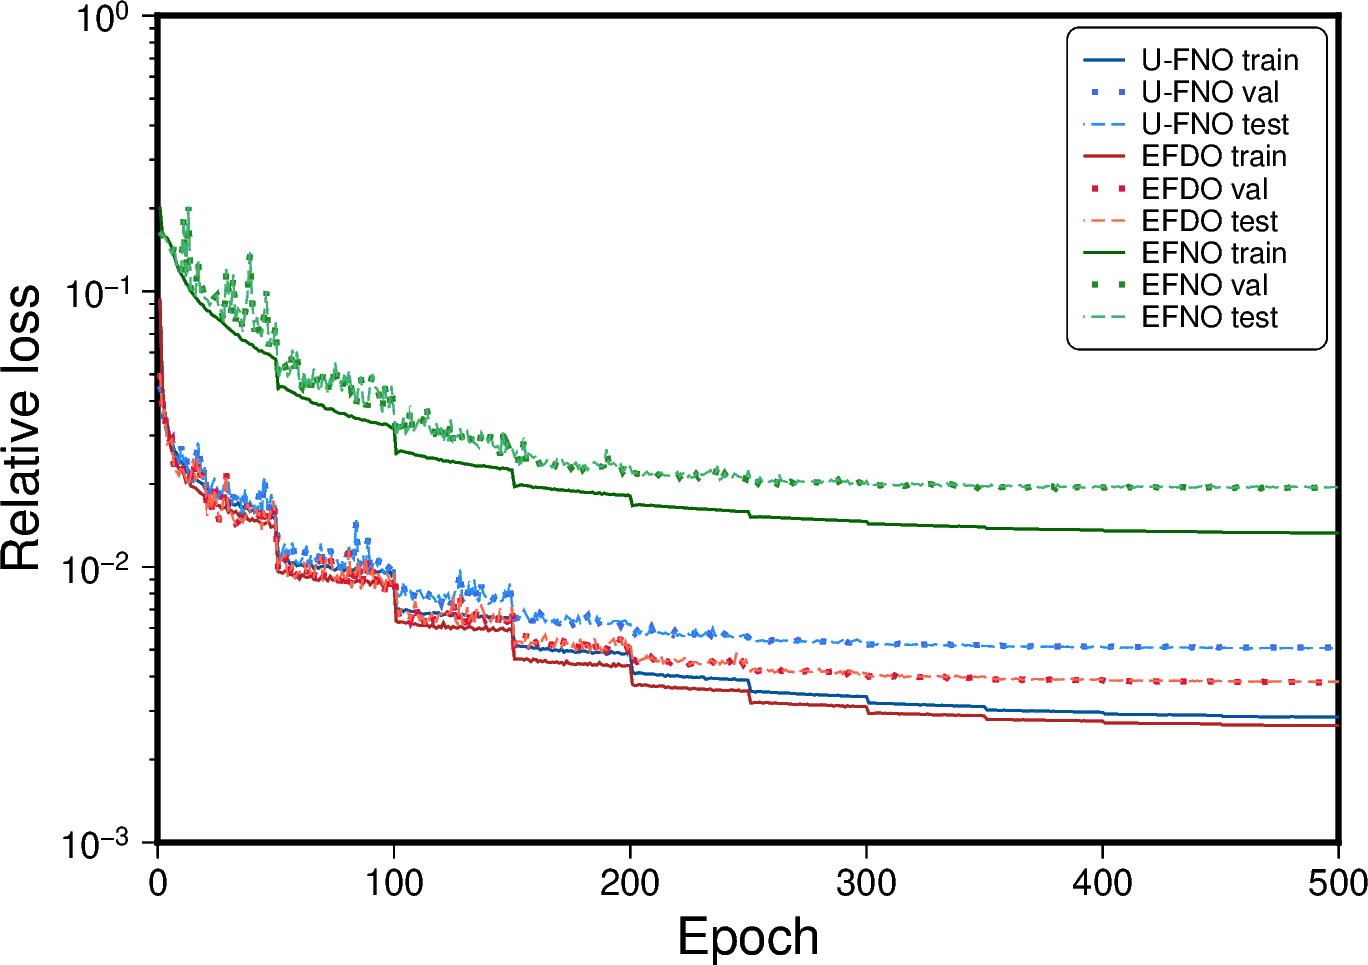

In [5]:
import pygmt

# Set file and directory paths
dir_path = "./Figure7/"
out_pdf_png = f"{dir_path}Figure7_py"

# some figure configurations
pygmt.config(MAP_GRID_PEN="0.05p,DARKGRAY")
pygmt.config(FONT_ANNOT_PRIMARY="10p,Helvetica,black")
pygmt.config(FONT_LABEL="14p,Helvetica,black")
pygmt.config(MAP_FRAME_PEN="0.6p,black")

fig = pygmt.Figure()

# setup basemap
fig.basemap(
    region=[0, 500, 0.001, 1],
    projection="X10c/7cl",
    frame=["WSrt", "xa100+lEpoch", "ya1f3p+lRelative loss"]
)

# plot data
# U-FNO
fig.plot(data=f"{dir_path}data1_train.txt", pen="0.6p,0/83/156", label="U-FNO train")
fig.plot(data=f"{dir_path}data1_val.txt", pen="1.3p,65/105/225,.", label="U-FNO val")
fig.plot(data=f"{dir_path}data1_test.txt", pen="0.4p,30/144/255,--", label="U-FNO test")

# EFDO
fig.plot(data=f"{dir_path}data2_train.txt", pen="0.6p,178/34/34", label="EFDO train")
fig.plot(data=f"{dir_path}data2_val.txt", pen="1.3p,220/20/60,.", label="EFDO val")
fig.plot(data=f"{dir_path}data2_test.txt", pen="0.4p,255/99/71,--", label="EFDO test")

# EFNO
fig.plot(data=f"{dir_path}data3_train.txt", pen="0.6p,0/100/0", label="EFNO train")
fig.plot(data=f"{dir_path}data3_val.txt", pen="1.3p,34/139/34,.", label="EFNO val")
fig.plot(data=f"{dir_path}data3_test.txt", pen="0.4p,60/179/113,--", label="EFNO test")

# add lengend
pygmt.config(FONT="7p,Helvetica,black")
pygmt.config(MAP_FRAME_PEN="0.3p,black")
fig.legend(
    position="jTR+w2.2c+o0.1c/0.1c",
    box="+p0.3p+r0.1c+gwhite"
)

# Save the figure to a PDF and PNG file
fig.savefig(f"{out_pdf_png}.pdf")
fig.savefig(f"{out_pdf_png}.png")

# Display the figure in jupyter notebook
fig.show()

# Figure 8

In [6]:
import pygmt

def plot_figure1(cpt_file_in, cpt_file_out, range_xy, info, data1, data2, data3):
    
    fig.shift_origin(xshift="-3.5c", yshift="-5.3c")
    pygmt.config(FONT_ANNOT_PRIMARY="8p", FONT_LABEL="8p", MAP_FRAME_PEN="1p")
    pygmt.config(FONT_TITLE="16p,Helvetica,black")
    # Create a custom color palette
    pygmt.makecpt(cmap=cpt_file_in, series="0/4/0.1", continuous=True, output=cpt_file_out)
    
    # Plot Reference
    grid1 = pygmt.xyz2grd(data1, region=range_xy, spacing=(0.3, 0.77419))
    fig.basemap(region=range_xy, projection="X5c/3c", frame=['xf1', 'ya1f1+lLog@-10@-(Frequency) [Hz]', 'WStr+tReference'])
    fig.grdimage(grid = grid1, region=range_xy, projection="X5c/3c", cmap=cpt_file_out)
    
    fig.text(x=-12, y=0.3, text=info, font='12p', no_clip=True)
    
    # Shift for next plot
    fig.shift_origin(xshift="5.25c")
    
    # Plot Predict
    grid2 = pygmt.xyz2grd(data2, region=range_xy, spacing=(0.3, 0.77419))
    fig.basemap(region=range_xy, projection="X5c/3c", frame=['xf1', 'yf1', 'WStr+tPredict'])
    fig.grdimage(grid = grid2, region=range_xy, projection="X5c/3c", cmap=cpt_file_out)
    
    pygmt.config(FONT_ANNOT_PRIMARY="16p", FONT_LABEL="16p")
    fig.colorbar(frame=['xaf0.2+lLog@-10@-(R@-xy@-) [@~\127\267@~m]', 'y'], position="jBL+w3c/0.25c+o5.6c/0c+v+ma")
    pygmt.config(FONT_ANNOT_PRIMARY="8p", FONT_LABEL="8p")
    
    # Shift for next plot
    fig.shift_origin(xshift="6.65c")
    
    # Plot Relative Error
    pygmt.makecpt(cmap=cpt_file_in, series="0/20/0.1", continuous=True, output=cpt_file_out)
    grid3 = pygmt.xyz2grd(data3, region=range_xy, spacing=(0.3, 0.77419))
    fig.basemap(region=range_xy, projection="X5c/3c", frame=['xf1', 'yf1', 'WStr+tRelative error [%]'])
    fig.grdimage(grid = grid3, region=range_xy, projection="X5c/3c", cmap=cpt_file_out)
    pygmt.config(FONT_ANNOT_PRIMARY="16p", FONT_LABEL="16p")
    fig.colorbar(frame=['xa5f1+lRelative error [%]', 'y'], position="jBL+w3c/0.25c+o5.6c/0c+v+ma")

    return 0

def plot_figure2(cpt_file_in, cpt_file_out, range_xy, info, data1, data2, data3):
    
    pygmt.config(FONT_ANNOT_PRIMARY="8p", FONT_LABEL="8p", MAP_FRAME_PEN="1p")
    pygmt.config(FONT_TITLE="16p,Helvetica,black")
    # Create a custom color palette
    pygmt.makecpt(cmap=cpt_file_in, series="0/4/0.1", continuous=True, output=cpt_file_out)
    
    # Plot Reference
    fig.shift_origin(xshift="-11.9c", yshift="-3.5c")
    grid1 = pygmt.xyz2grd(data1, region=range_xy, spacing=(0.3, 0.77419))
    fig.basemap(region=range_xy, projection="X5c/3c", frame=['xf1', 'ya1f1+lLog@-10@-(Frequency) [Hz]', "WStr"])
    fig.grdimage(grid = grid1, region=range_xy, projection="X5c/3c", cmap=cpt_file_out)
    fig.text(x=-12, y=0.3, text=info, font='12p', no_clip=True)
    
    # Shift for next plot
    fig.shift_origin(xshift="5.25c")
    
    # Plot Predict
    grid2 = pygmt.xyz2grd(data2, region=range_xy, spacing=(0.3, 0.77419))
    fig.basemap(region=range_xy, projection="X5c/3c", frame=['xf1', 'yf1', 'WStr'])
    fig.grdimage(grid = grid2, region=range_xy, projection="X5c/3c", cmap=cpt_file_out)
    pygmt.config(FONT_ANNOT_PRIMARY="16p", FONT_LABEL="16p")
    fig.colorbar(frame=['xaf0.2+lLog@-10@-(R@-xy@-) [@~\127\267@~m]', 'y'], position="jBL+w3c/0.25c+o5.6c/0c+v+ma")
    pygmt.config(FONT_ANNOT_PRIMARY="8p", FONT_LABEL="8p")
    
    # Shift for next plot
    fig.shift_origin(xshift="6.65c")
    
    # Plot Relative Error
    pygmt.makecpt(cmap=cpt_file_in, series="0/20/0.1", continuous=True, output=cpt_file_out)
    grid3 = pygmt.xyz2grd(data3, region=range_xy, spacing=(0.3, 0.77419))
    fig.basemap(region=range_xy, projection="X5c/3c", frame=['xf1', 'yf1', "WStr"])
    fig.grdimage(grid = grid3, region=range_xy, projection="X5c/3c", cmap=cpt_file_out)
    pygmt.config(FONT_ANNOT_PRIMARY="16p", FONT_LABEL="16p")
    fig.colorbar(frame=['xa5f1+lRelative error [%]', 'y'], position="jBL+w3c/0.25c+o5.6c/0c+v+ma")

    return 0

def plot_figure3(cpt_file_in, cpt_file_out, range_xy, info, data1, data2, data3):
    
    pygmt.config(FONT_ANNOT_PRIMARY="8p", FONT_LABEL="8p", MAP_FRAME_PEN="1p")
    pygmt.config(FONT_TITLE="16p,Helvetica,black")
    # Create a custom color palette
    pygmt.makecpt(cmap=cpt_file_in, series="0/4/0.1", continuous=True, output=cpt_file_out)
    
    # Plot Reference
    fig.shift_origin(xshift="-11.9c", yshift="-3.5c")
    grid1 = pygmt.xyz2grd(data1, region=range_xy, spacing=(0.3, 0.77419))
    fig.basemap(region=range_xy, projection="X5c/3c", frame=['xa2f1+lY-Distance [km]', 'ya1f1+lLog@-10@-(Frequency) [Hz]', "WStr"])
    fig.grdimage(grid = grid1, region=range_xy, projection="X5c/3c", cmap=cpt_file_out)
    fig.text(x=-12, y=0.3, text=info, font='12p', no_clip=True)
    
    # Shift for next plot
    fig.shift_origin(xshift="5.25c")
    
    # Plot Predict
    grid2 = pygmt.xyz2grd(data2, region=range_xy, spacing=(0.3, 0.77419))
    fig.basemap(region=range_xy, projection="X5c/3c", frame=['xa2f1+lY-Distance [km]', 'yf1', 'WStr'])
    fig.grdimage(grid = grid2, region=range_xy, projection="X5c/3c", cmap=cpt_file_out)
    pygmt.config(FONT_ANNOT_PRIMARY="16p", FONT_LABEL="16p")
    fig.colorbar(frame=['xaf0.2+lLog@-10@-(R@-xy@-) [@~\127\267@~m]', 'y'], position="jBL+w3c/0.25c+o5.6c/0c+v+ma")
    pygmt.config(FONT_ANNOT_PRIMARY="8p", FONT_LABEL="8p")
    
    # Shift for next plot
    fig.shift_origin(xshift="6.65c")
    
    # Plot Relative Error
    pygmt.makecpt(cmap=cpt_file_in, series="0/20/0.1", continuous=True, output=cpt_file_out)
    grid3 = pygmt.xyz2grd(data3, region=range_xy, spacing=(0.3, 0.77419))
    fig.basemap(region=range_xy, projection="X5c/3c", frame=['xa2f1+lY-Distance [km]', 'yf1', "WStr"])
    fig.grdimage(grid = grid3, region=range_xy, projection="X5c/3c", cmap=cpt_file_out)
    pygmt.config(FONT_ANNOT_PRIMARY="16p", FONT_LABEL="16p")
    fig.colorbar(frame=['xa5f1+lRelative error [%]', 'y'], position="jBL+w3c/0.25c+o5.6c/0c+v+ma")

    return 0


Formatted range: -6.4/6.4/0/6
-6.15 6.15 -2.419355 3
Formatted range: -6.15/6.15/-2.419355/3


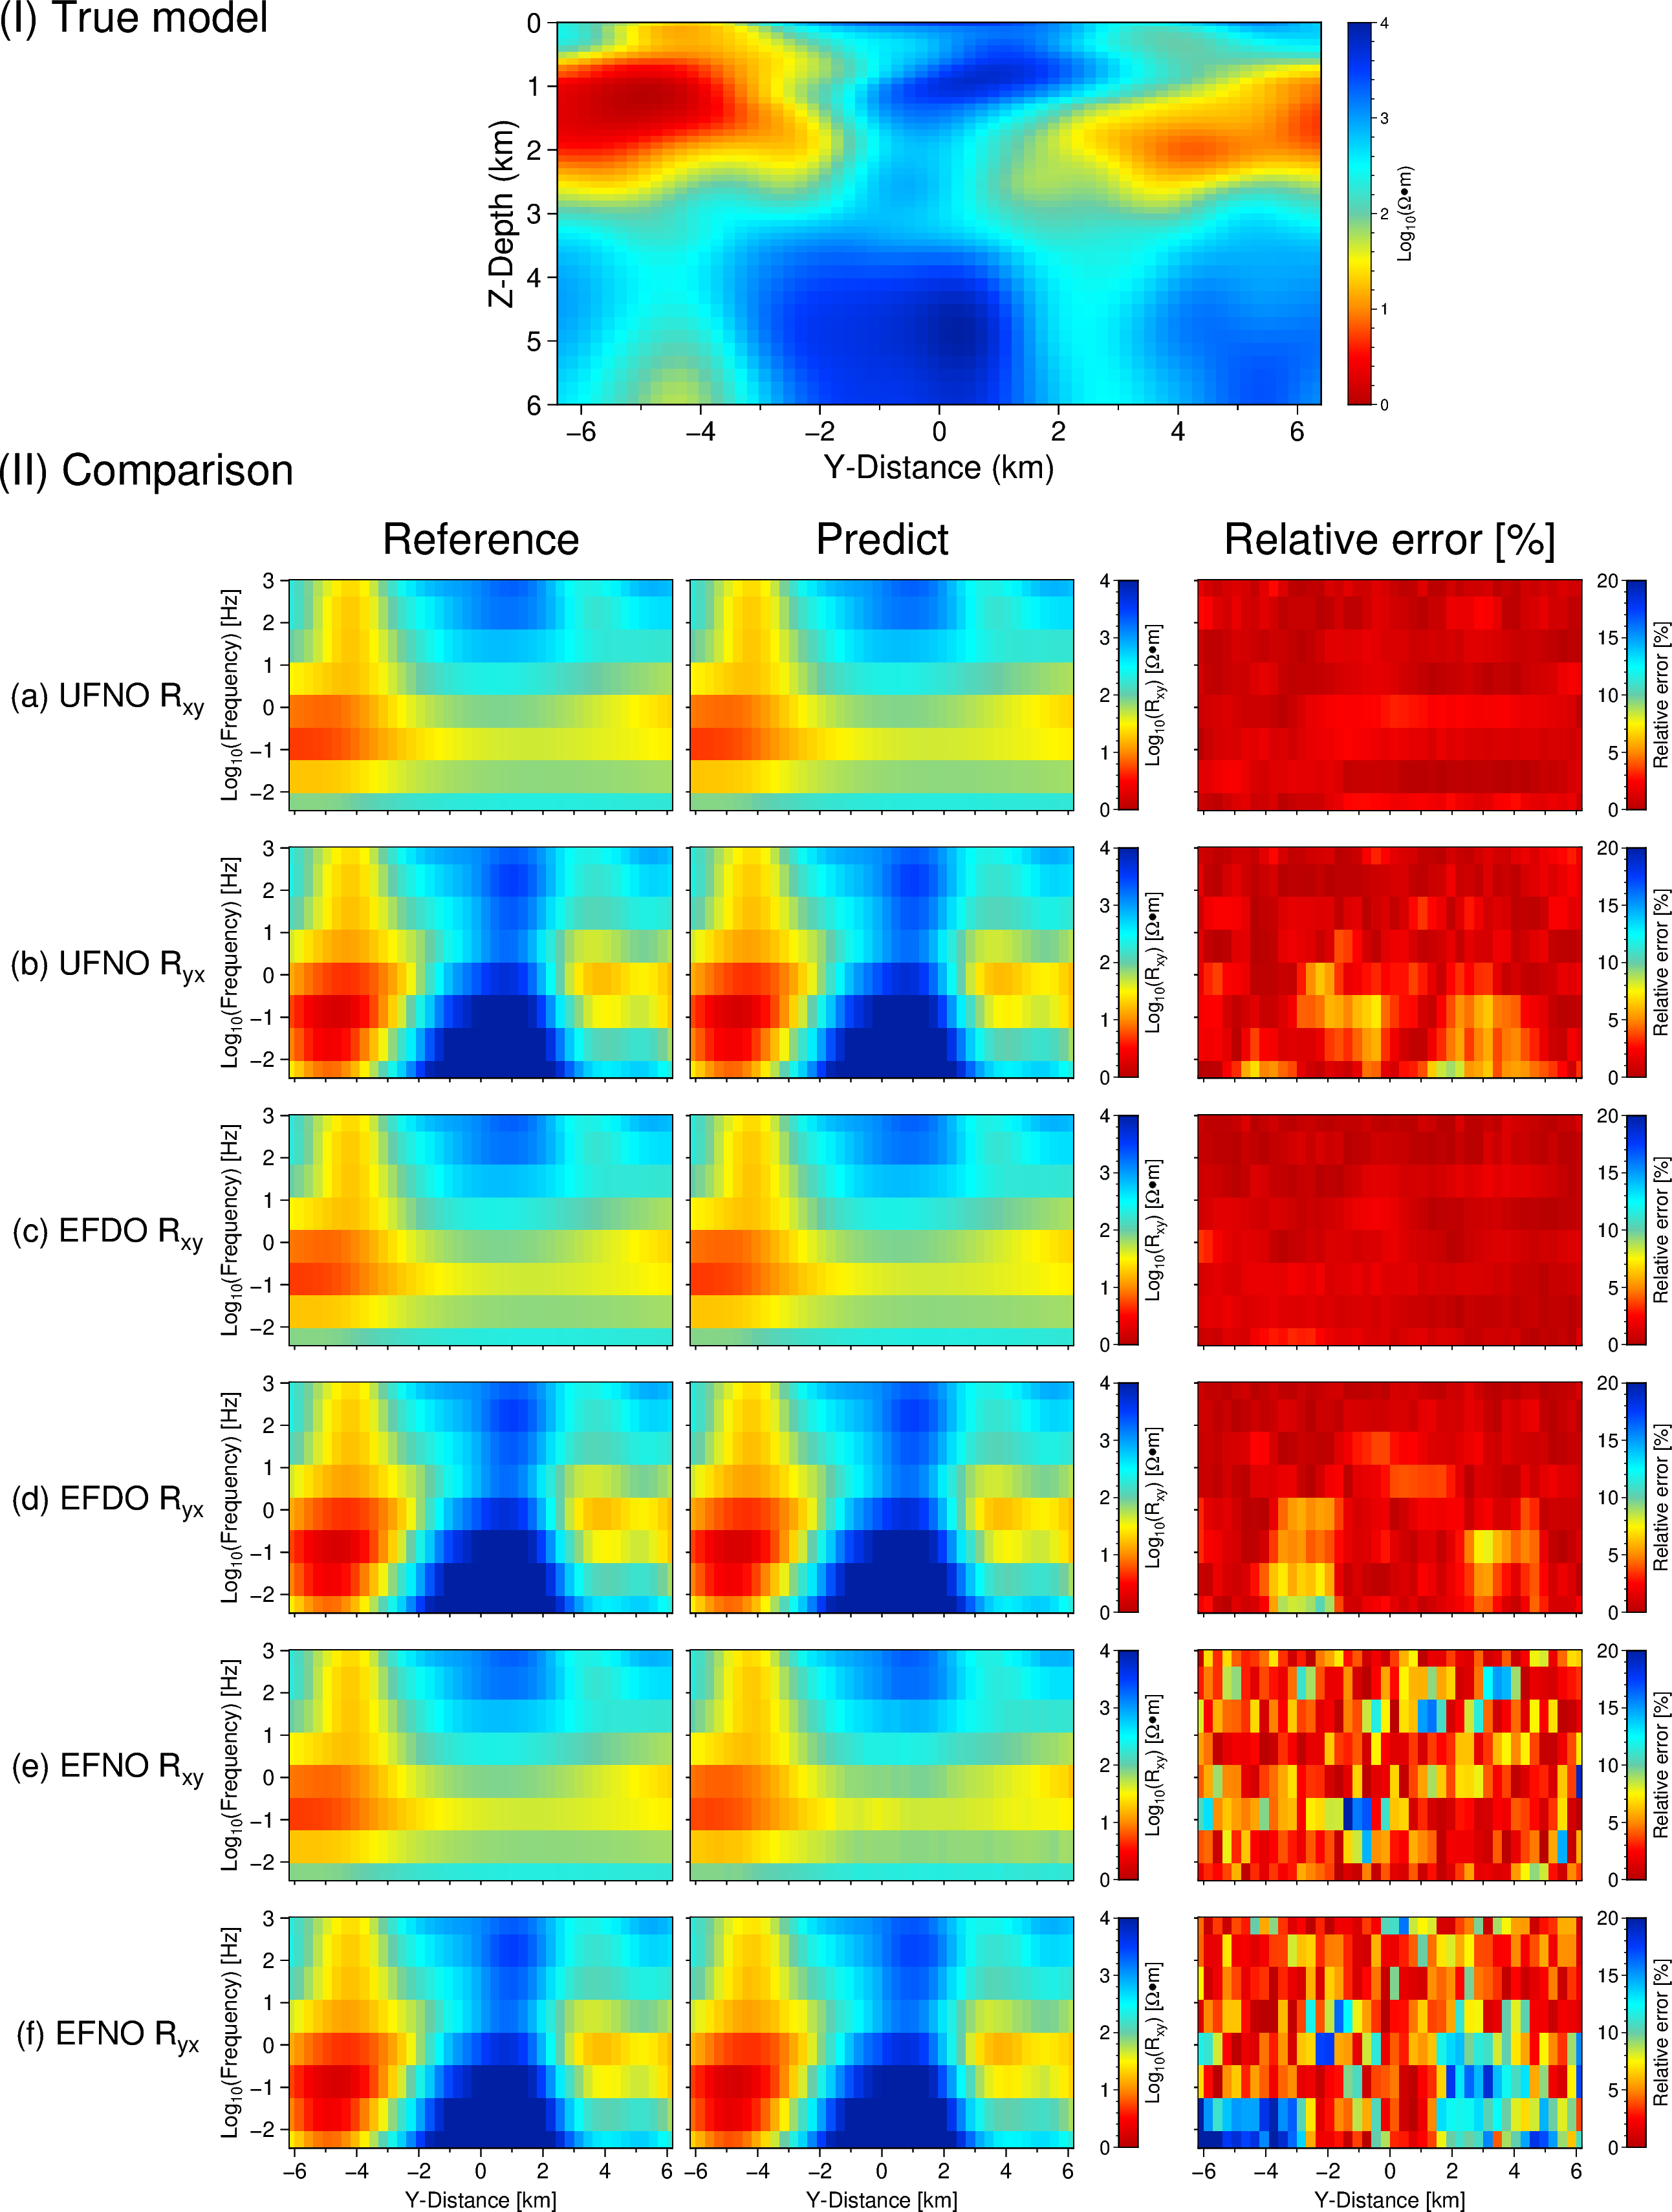

In [7]:
import pandas as pd

def load_xyz_file(filename):
    df = pd.read_csv(filename, sep=r'\s+', header=None, names=['x', 'y', 'z'])
    return df

def preset1():
    ymin, ymax = -6.4, 6.4
    zmin, zmax = 0, 6
    return f"{ymin}/{ymax}/{zmin}/{zmax}"

def preset2():
    xmin = -6150
    xmax = 6150
    ymin = -2.419355
    ymax = 3
    scale = 1000
    xmin = xmin / scale
    xmax = xmax / scale

    # Print the scaled range
    print(f"{xmin} {xmax} {ymin} {ymax}")
    
    # Create a formatted string for the range
    range_xy = f"{xmin}/{xmax}/{ymin}/{ymax}"
    return range_xy


range_yz = preset1()
print("Formatted range:", range_yz)
range_xy = preset2()
print("Formatted range:", range_xy)

# Set file and directory paths
dir_path = "./Figure8/"
grd_file = f"{dir_path}model2501.grd"
cpt_file_in = f"{dir_path}thermal.cpt"
cpt_file_out = f"{dir_path}rbow.cpt"
out_pdf_png = f"{dir_path}Figure8_py"

fig = pygmt.Figure()
#true model
# Customize font settings
pygmt.config(FONT_ANNOT_PRIMARY="10p", FONT_LABEL="12p", FONT_TITLE="14p", MAP_FRAME_PEN="0.5p")
# Create a colormap
pygmt.makecpt(cmap=cpt_file_in, series="0/4.0/0.01", continuous=True, output=cpt_file_out)
    
# Convert grid range using grdedit in original GMT, currently, PyGMT does not support the `grdedit` and `grdconvert` modules
# gmt grdedit model2501_coreRangeGrids.grd -R-6.4/6.4/0/6 -Gmodel2501.grd
    
# Plot the grid image
fig.grdimage(grid=grd_file, region=range_yz, projection="X10c/-5c", frame=["xa2f1+lY-Distance (km)", "ya1f1+lZ-Depth (km)", "WStr"], cmap=cpt_file_out)
    
# Add a colorbar
fig.colorbar(cmap=cpt_file_out, position="jTC+w5c/0.3c+o5.5c/0.0c+v", frame=["xaf+lLog@-10@-(@~W\267@~m)"])
fig.text(x=-13.5, y=-0.1, text="(I) True model", font='16p', no_clip=True)
fig.text(x=-13.3, y=7, text="(II) Comparison", font='16p', no_clip=True)

## UFNO Rxy mode
info1 = "(a) UFNO R@-xy@-"
fileName1 = f"{dir_path}UFNO_real_xy.txt"
fileName2 = f"{dir_path}UFNO_predict_xy.txt"
fileName3 = f"{dir_path}UFNO_error_xy.txt"
data1 = load_xyz_file(fileName1)
data2 = load_xyz_file(fileName2)
data3 = load_xyz_file(fileName3)
plot_figure1(cpt_file_in, cpt_file_out, range_xy, info1, data1, data2, data3)

## UFNO Ryx mode
info2 = "(b) UFNO R@-yx@-"
fileName1 = f"{dir_path}UFNO_real_yx.txt"
fileName2 = f"{dir_path}UFNO_predict_yx.txt"
fileName3 = f"{dir_path}UFNO_error_yx.txt"
data1 = load_xyz_file(fileName1)
data2 = load_xyz_file(fileName2)
data3 = load_xyz_file(fileName3)
plot_figure2(cpt_file_in, cpt_file_out, range_xy, info2, data1, data2, data3)

## EFDO Rxy mode
info3 = "(c) EFDO R@-xy@-"
fileName1 = f"{dir_path}EFDO_real_xy.txt"
fileName2 = f"{dir_path}EFDO_predict_xy.txt"
fileName3 = f"{dir_path}EFDO_error_xy.txt"
data1 = load_xyz_file(fileName1)
data2 = load_xyz_file(fileName2)
data3 = load_xyz_file(fileName3)
plot_figure2(cpt_file_in, cpt_file_out, range_xy, info3, data1, data2, data3)

## EFDO Ryx mode
info4 = "(d) EFDO R@-yx@-"
fileName1 = f"{dir_path}EFDO_real_yx.txt"
fileName2 = f"{dir_path}EFDO_predict_yx.txt"
fileName3 = f"{dir_path}EFDO_error_yx.txt"
data1 = load_xyz_file(fileName1)
data2 = load_xyz_file(fileName2)
data3 = load_xyz_file(fileName3)
plot_figure2(cpt_file_in, cpt_file_out, range_xy, info4, data1, data2, data3)

## EFNO Rxy mode
info5 = "(e) EFNO R@-xy@-"
fileName1 = f"{dir_path}EFNO_real_xy.txt"
fileName2 = f"{dir_path}EFNO_predict_xy.txt"
fileName3 = f"{dir_path}EFNO_error_xy.txt"
data1 = load_xyz_file(fileName1)
data2 = load_xyz_file(fileName2)
data3 = load_xyz_file(fileName3)
plot_figure2(cpt_file_in, cpt_file_out, range_xy, info5, data1, data2, data3)

## EFNO Ryx mode
info6 = "(f) EFNO R@-yx@-"
fileName1 = f"{dir_path}EFNO_real_yx.txt"
fileName2 = f"{dir_path}EFNO_predict_yx.txt"
fileName3 = f"{dir_path}EFNO_error_yx.txt"
data1 = load_xyz_file(fileName1)
data2 = load_xyz_file(fileName2)
data3 = load_xyz_file(fileName3)
plot_figure3(cpt_file_in, cpt_file_out, range_xy, info6, data1, data2, data3)

# Save the figure to a PDF and PNG file
fig.savefig(f"{out_pdf_png}.png")
fig.savefig(f"{out_pdf_png}.pdf")

# Display the figure in jupyter notebook
fig.show()

# Figure 9

In [8]:
import pygmt
from scipy.io import loadmat

def plot_function1(loc, rhoxy_predict, rhoxy_real, rhoyx_predict, rhoyx_real, info):
    
    pygmt.config(FONT_ANNOT_PRIMARY="8p", FONT_LABEL="8p", MAP_FRAME_PEN="0.5p")
    pygmt.config(FONT_TITLE="16p,Helvetica,black")
    # Plot Rxy
    fig.basemap(region=[-6.3, 6.3, 0, 2000], projection='X5c/3c', frame=['WStr+tRxy', 'xf1', 'ya500f100+l"Resistivity [@~W\267@~m]"'])
    fig.plot(x=loc, y=rhoxy_real, pen='0.6p,red', label="Reference")
    fig.plot(x=loc, y=rhoxy_predict, pen='0.6p,0/83/156,..-', label="Predict")
    fig.legend(position='JTL+jTL+o0.1/0.1', box='+p0.25+gwhite')

    fig.text(x=-14, y=750, text=info, font='9p', no_clip=True)

    # Plot Ryx with x-shift
    fig.shift_origin(xshift='5.25c')
    fig.basemap(region=[-6.3, 6.3, 0, 2000], projection='X5c/3c', frame=['WStr+tRyx', 'xf1', 'yf100'])
    fig.plot(x=loc, y=rhoyx_real, pen='0.6p,red', label="Reference")
    fig.plot(x=loc, y=rhoyx_predict, pen='0.6p,0/83/156,..-', label="Predict")
    fig.legend(position='JTL+jTL+o0.1/0.1', box='+p0.25+gwhite')

    # Plot Relative Error with additional x-shift
    fig.shift_origin(xshift='6c')
    fig.basemap(region=[-6.3, 6.3, 0, 20], projection='X5c/3c', frame=['WStr+tRelative Error [%]', 'xf1', 'ya5f1+lRelative Error [%]'])
    fig.plot(x=loc, y=abs((rhoxy_predict - rhoxy_real) / rhoxy_real * 100), pen='0.6p,red', label="Rxy")
    fig.plot(x=loc, y=abs((rhoyx_predict - rhoyx_real) / rhoyx_real * 100), pen='0.6p,0/83/156,..-', label="Ryx")
    fig.legend(position='JTR+jTR+o0.1/0.1', box='+p0.25+gwhite')

    return 0

def plot_function2(loc, rhoxy_predict, rhoxy_real, rhoyx_predict, rhoyx_real, info,shift=0):
    
    pygmt.config(FONT_ANNOT_PRIMARY="8p", FONT_LABEL="8p", MAP_FRAME_PEN="0.5p")
    pygmt.config(FONT_TITLE="16p,Helvetica,black")
    # Plot Rxy
    fig.shift_origin(xshift='-11.25c', yshift='-3.25c')
    fig.basemap(region=[-6.3, 6.3, 0, 2000], projection='X5c/3c', frame=['WStr', 'xf1', 'ya500f100+l"Resistivity [@~W\267@~m]"'])
    fig.plot(x=loc, y=rhoxy_real, pen='0.6p,red', label="Reference")
    fig.plot(x=loc, y=rhoxy_predict, pen='0.6p,0/83/156,..-', label="Predict")
    fig.legend(position='JTL+jTL+o0.1/0.1', box='+p0.25+gwhite')

    fig.text(x=-14-shift, y=750, text=info, font='9p', no_clip=True)

    # Plot Ryx with x-shift
    fig.shift_origin(xshift='5.25c')
    fig.basemap(region=[-6.3, 6.3, 0, 2000], projection='X5c/3c', frame=['WStr', 'xf1', 'yf100'])
    fig.plot(x=loc, y=rhoyx_real, pen='0.6p,red', label="Reference")
    fig.plot(x=loc, y=rhoyx_predict, pen='0.6p,0/83/156,..-', label="Predict")
    fig.legend(position='JTL+jTL+o0.1/0.1', box='+p0.25+gwhite')

    # Plot Relative Error with additional x-shift
    fig.shift_origin(xshift='6c')
    fig.basemap(region=[-6.3, 6.3, 0, 20], projection='X5c/3c', frame=['WStr', 'xf1', 'ya5f1+lRelative Error [%]'])
    fig.plot(x=loc, y=abs((rhoxy_predict - rhoxy_real) / rhoxy_real * 100), pen='0.6p,red', label="Rxy")
    fig.plot(x=loc, y=abs((rhoyx_predict - rhoyx_real) / rhoyx_real * 100), pen='0.6p,0/83/156,..-', label="Ryx")
    fig.legend(position='JTR+jTR+o0.1/0.1', box='+p0.25+gwhite')

    return 0

def plot_function3(loc, rhoxy_predict, rhoxy_real, rhoyx_predict, rhoyx_real, info):
    
    pygmt.config(FONT_ANNOT_PRIMARY="8p", FONT_LABEL="8p", MAP_FRAME_PEN="0.5p")
    pygmt.config(FONT_TITLE="16p,Helvetica,black")
    # Plot Rxy
    fig.shift_origin(xshift='-11.25c', yshift='-3.25c')
    fig.basemap(region=[-6.3, 6.3, 0, 2000], projection='X5c/3c', frame=['WStr', 'xf1+lY-Distance [km]', 'ya500f100+lResistivity [@~W\267@~m]'])
    fig.plot(x=loc, y=rhoxy_real, pen='0.6p,red', label="Reference")
    fig.plot(x=loc, y=rhoxy_predict, pen='0.6p,0/83/156,..-', label="Predict")
    fig.legend(position='JTL+jTL+o0.1/0.1', box='+p0.25+gwhite')

    fig.text(x=-14+0.4, y=750, text=info, font='9p', no_clip=True)

    # Plot Ryx with x-shift
    fig.shift_origin(xshift='5.25c')
    fig.basemap(region=[-6.3, 6.3, 0, 1500], projection='X5c/3c', frame=['WStr', 'xf1+lY-Distance [km]', 'yf100'])
    fig.plot(x=loc, y=rhoyx_real, pen='0.6p,red', label="Reference")
    fig.plot(x=loc, y=rhoyx_predict, pen='0.6p,0/83/156,..-', label="Predict")
    fig.legend(position='JTL+jTL+o0.1/0.1', box='+p0.25+gwhite')

    # Plot Relative Error with additional x-shift
    fig.shift_origin(xshift='6c')
    fig.basemap(region=[-6.3, 6.3, 0, 20], projection='X5c/3c', frame=['WStr', 'xf1+lY-Distance [km]', 'ya5f1+lRelative Error [%]'])
    fig.plot(x=loc, y=abs((rhoxy_predict - rhoxy_real) / rhoxy_real * 100), pen='0.6p,red', label="Rxy")
    fig.plot(x=loc, y=abs((rhoyx_predict - rhoyx_real) / rhoyx_real * 100), pen='0.6p,0/83/156,..-', label="Ryx")
    fig.legend(position='JTR+jTR+o0.1/0.1', box='+p0.25+gwhite')

    return 0


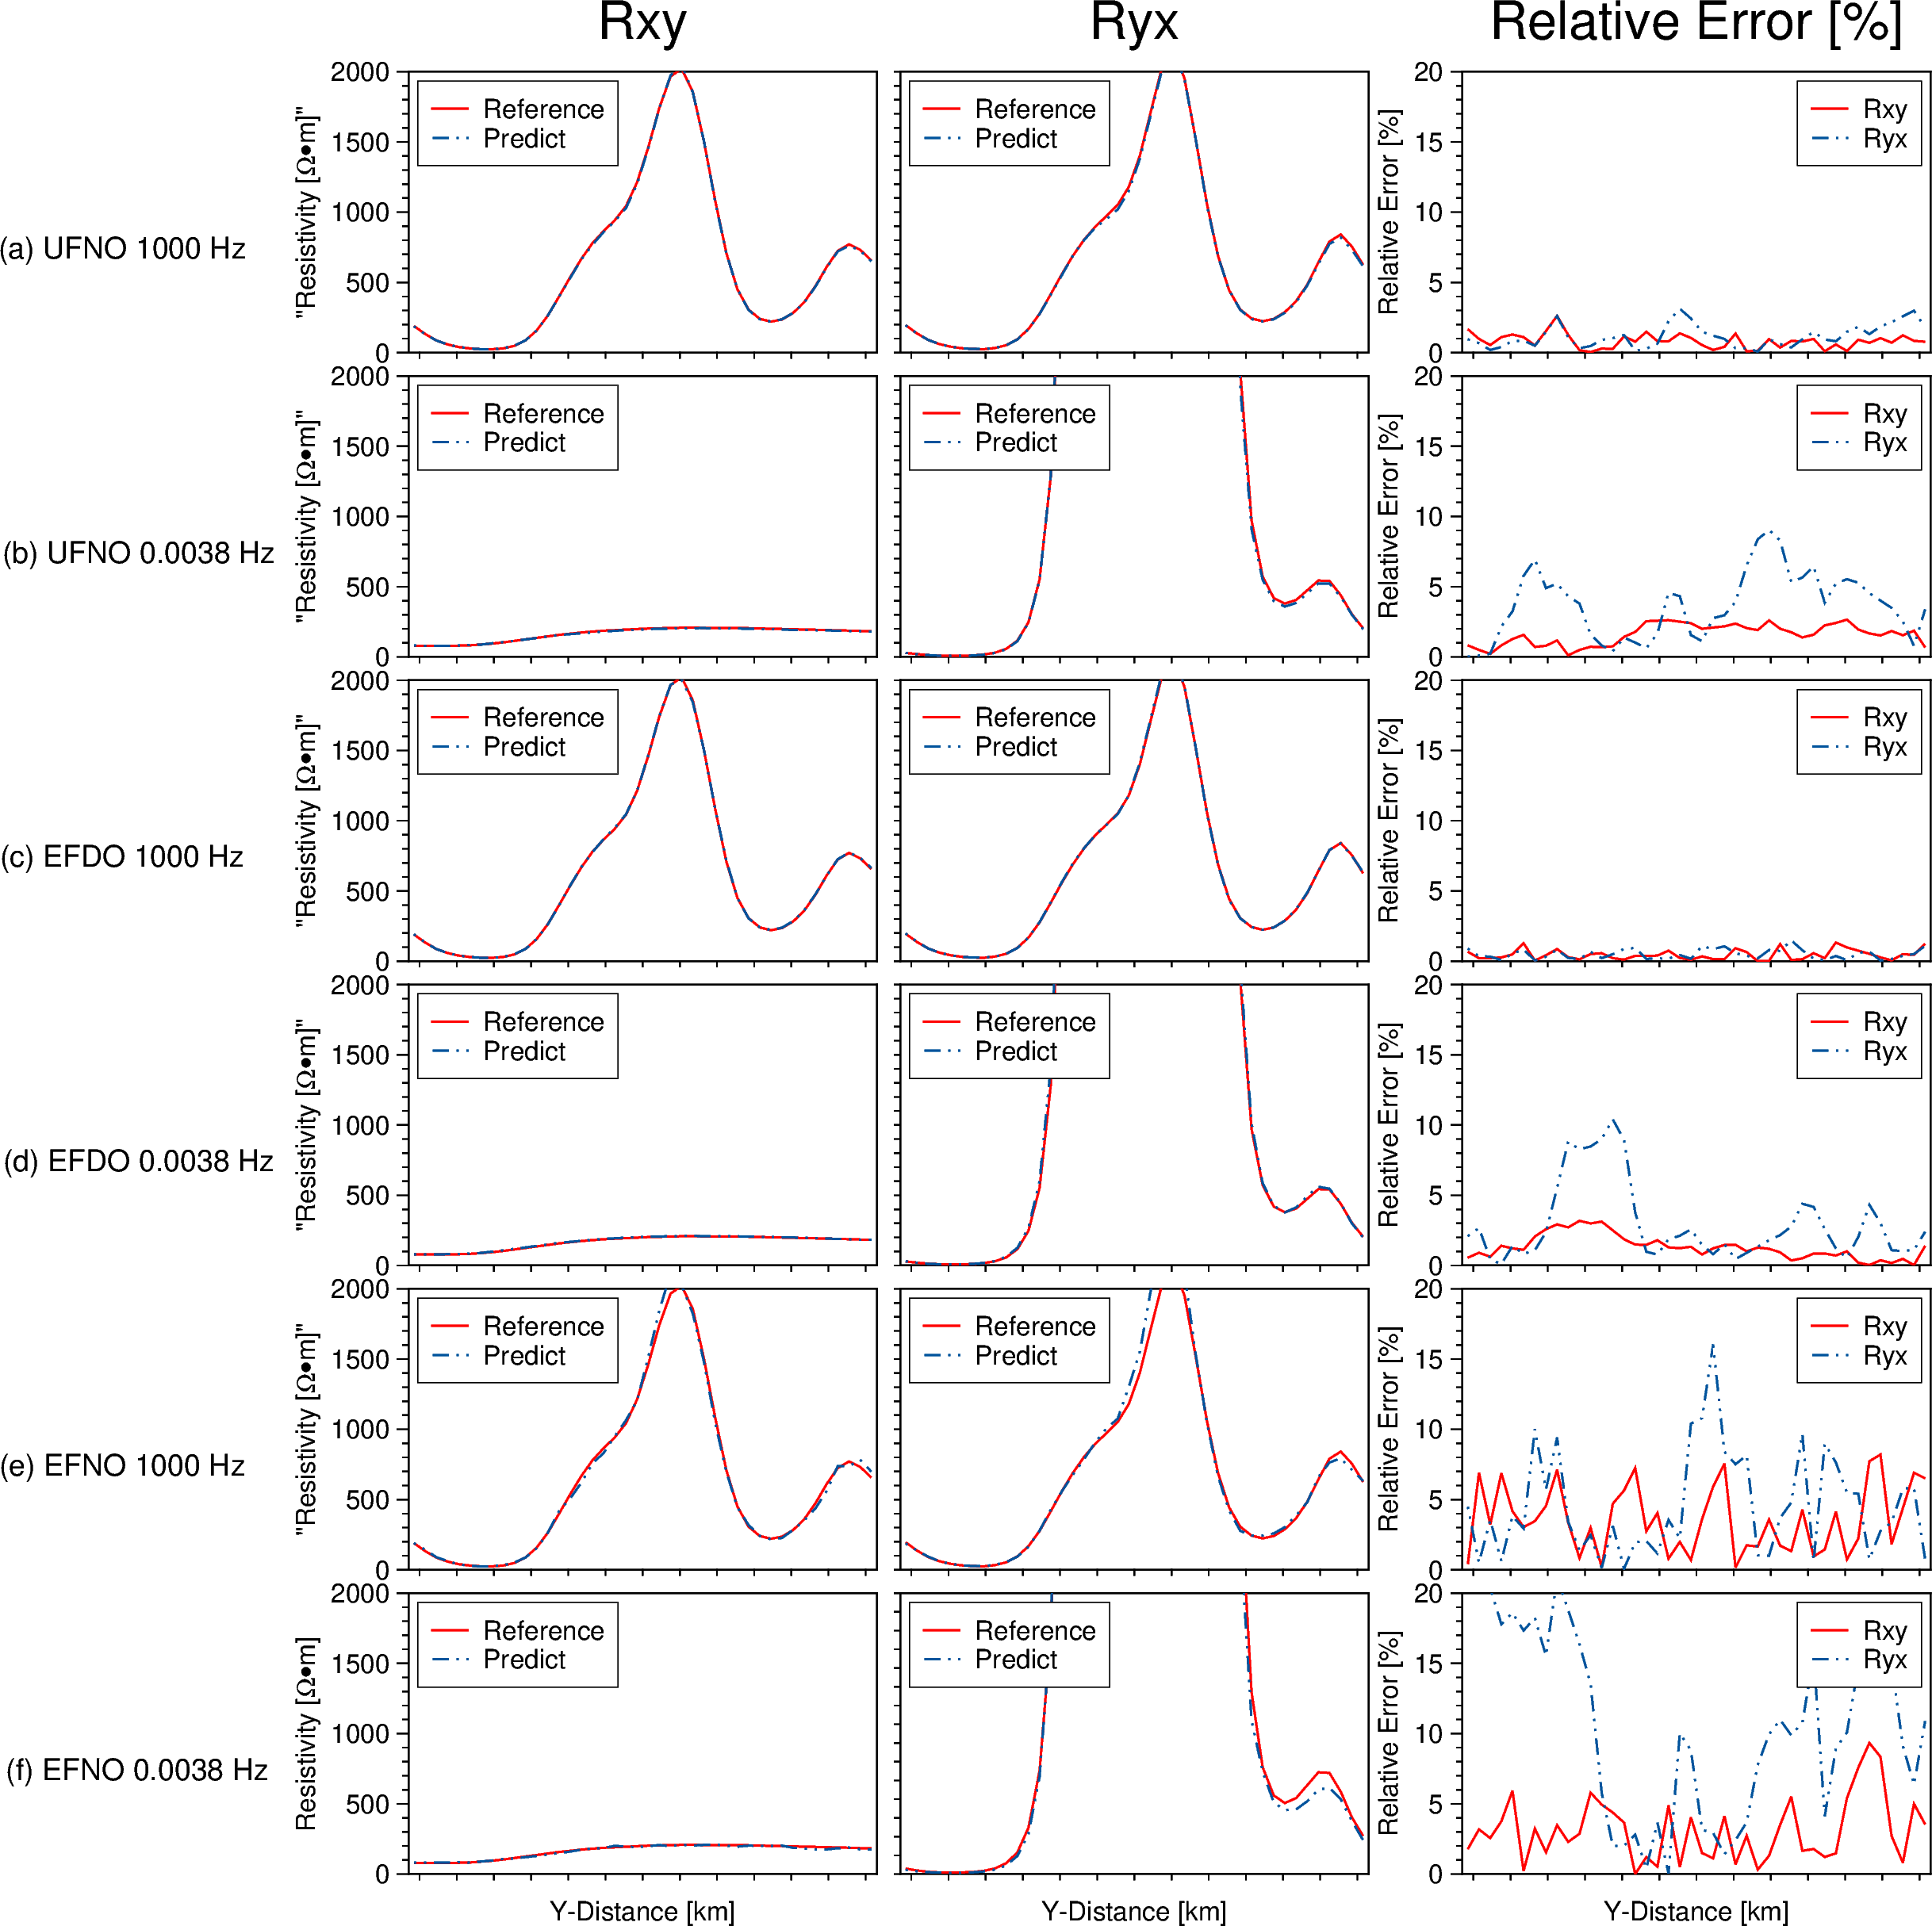

In [9]:
# Set file and directory paths
dir_path = "./Figure9/"
out_pdf_png = f"{dir_path}Figure9_py"

# read mat file
file_path = f"{dir_path}Real_predict.mat"
data = loadmat(file_path)

# extract data
loc = data['loc'].flatten()  
freqs = data['freqs'].flatten()


## EFNO
EFNO_rhoxy_site_real = data['EFNO_rhoxy_real']
EFNO_rhoxy_site_predict = data['EFNO_rhoxy_predict']
EFNO_rhoyx_site_real = data['EFNO_rhoyx_real']
EFNO_rhoyx_site_predict = data['EFNO_rhoyx_predict']

## EFDO
EFDO_rhoxy_site_real = data['EFDO3d_rhoxy_real']
EFDO_rhoxy_site_predict = data['EFDO3d_rhoxy_predict']
EFDO_rhoyx_site_real = data['EFDO3d_rhoyx_real']
EFDO_rhoyx_site_predict = data['EFDO3d_rhoyx_predict']

## UFNO
UFNO_rhoxy_site_real = data['UFNO3d_rhoxy_real']
UFNO_rhoxy_site_predict = data['UFNO3d_rhoxy_predict']
UFNO_rhoyx_site_real = data['UFNO3d_rhoyx_real']
UFNO_rhoyx_site_predict = data['UFNO3d_rhoyx_predict']

# convert unit form [m] to [km]
loc = loc / 1000

fig = pygmt.Figure()

# UFNO
plot_function1(loc, UFNO_rhoxy_site_predict[0,:], UFNO_rhoxy_site_real[0,:], UFNO_rhoyx_site_predict[0,:], UFNO_rhoyx_site_real[0,:], "(a) UFNO 1000 Hz")
plot_function2(loc, UFNO_rhoxy_site_predict[-1,:], UFNO_rhoxy_site_real[-1,:], UFNO_rhoyx_site_predict[-1,:], UFNO_rhoyx_site_real[-1,:], "(b) UFNO 0.0038 Hz", -0.44)

# EFDO
plot_function2(loc, EFDO_rhoxy_site_predict[0,:], EFDO_rhoxy_site_real[0,:], EFDO_rhoyx_site_predict[0,:], EFDO_rhoyx_site_real[0,:], "(c) EFDO 1000 Hz")
plot_function2(loc, EFDO_rhoxy_site_predict[-1,:], EFDO_rhoxy_site_real[-1,:], EFDO_rhoyx_site_predict[-1,:], EFDO_rhoyx_site_real[-1,:], "(d) EFDO 0.0038 Hz", -0.44)

# EFNO
plot_function2(loc, EFNO_rhoxy_site_predict[0,:], EFNO_rhoxy_site_real[0,:], EFNO_rhoyx_site_predict[0,:], EFNO_rhoyx_site_real[0,:], "(e) EFNO 1000 Hz")
plot_function3(loc, EFNO_rhoxy_site_predict[-1,:], EFNO_rhoxy_site_real[-1,:], EFNO_rhoyx_site_predict[-1,:], EFNO_rhoyx_site_real[-1,:], "(f) EFNO 0.0038 Hz")

# Save the figure to a PDF and PNG file
fig.savefig(f"{out_pdf_png}.png")
fig.savefig(f"{out_pdf_png}.pdf")

# Display the figure in jupyter notebook
fig.show()


# Figure 10 

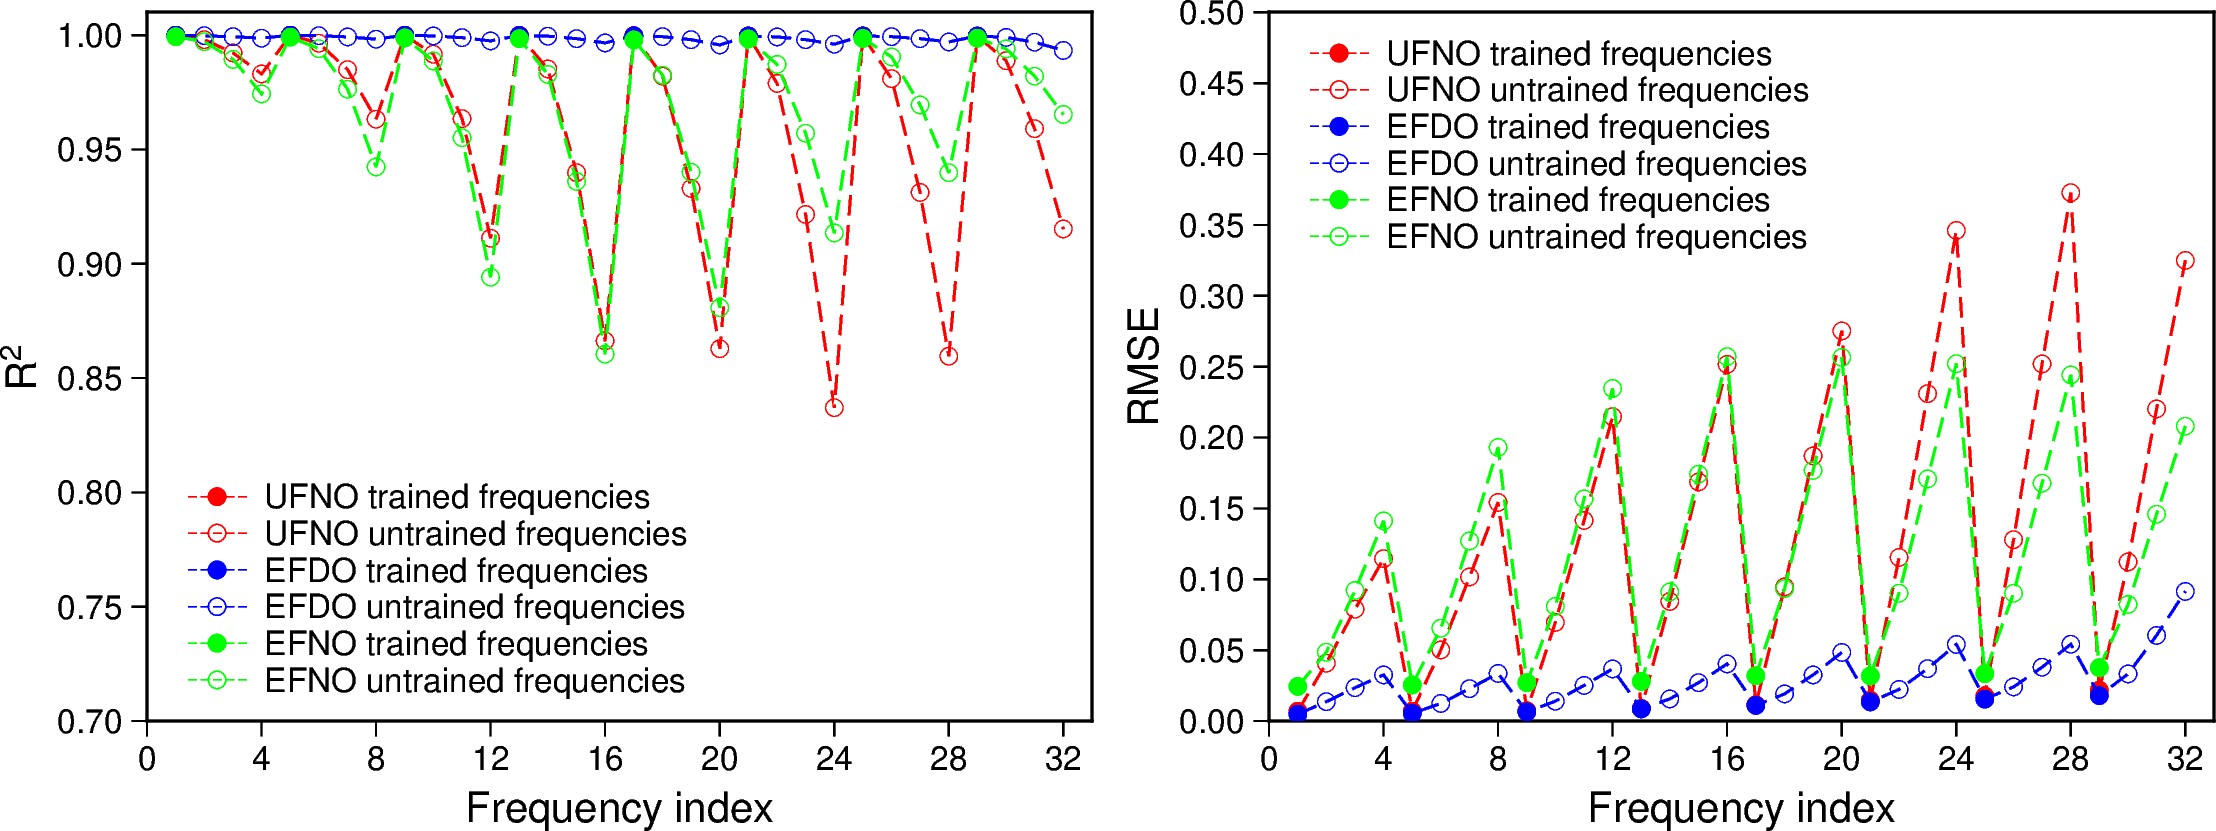

In [10]:
from scipy.io import loadmat

# read mat fileimport pygmt
import os 

# Set file and directory paths
dir_path = "./Figure10/"
out_pdf_png = f"{dir_path}Figure10_py"
legend_file_path = f"{dir_path}legend.txt"

fig = pygmt.Figure()

# plot the R^2 and trained/untrained frequencies figure
pygmt.config(FONT_ANNOT_PRIMARY="8p", FONT_LABEL="10p", MAP_FRAME_PEN="0.6p")
fig.basemap(region=[0, 33, 0.70, 1.01], projection="X8c/6c", frame=["xa4+lFrequency index", "ya0.05+l@R@+2@+@", "WS"])
fig.basemap(region=[0, 33, 0.70, 1.01], projection="X8c/6c", frame=["en"])
# UFNO
fig.plot(data=f"{dir_path}UFNO_r2.txt", pen="0.6p,red,-")
fig.plot(data=f"{dir_path}UFNO_r2.txt", style="c0.15c", pen="0.2p,red")
fig.plot(data=f"{dir_path}UFNO_r2_train.txt", style="c0.15c", fill="red")
# EFDO
fig.plot(data=f"{dir_path}EFDO_r2.txt", pen="0.6p,blue,-")
fig.plot(data=f"{dir_path}EFDO_r2.txt", style="c0.15c", pen="0.2p,blue")
fig.plot(data=f"{dir_path}EFDO_r2_train.txt", style="c0.15c", fill="blue")
# EFNO
fig.plot(data=f"{dir_path}EFNO_r2.txt", pen="0.6p,green1,-")
fig.plot(data=f"{dir_path}EFNO_r2.txt", style="c0.15c", pen="0.2p,green1")
fig.plot(data=f"{dir_path}EFNO_r2_train.txt", style="c0.15c", fill="green1")

# legend content
legend_content = """
S 0.4c c 0.15c red 0.25p,red 0.8c UFNO trained frequencies
G -1l
S 0.4c - 0.5c red 0.25p,red,-- 

S 0.4c c 0.15c - 0.25p,red 0.8c UFNO untrained frequencies
G -1l
S 0.4c - 0.5c red 0.25p,red,--

S 0.4c c 0.15c blue 0.25p,blue 0.8c EFDO trained frequencies
G -1l
S 0.4c - 0.5c blue 0.25p,blue,-- 

S 0.4c c 0.15c - 0.25p,blue 0.8c EFDO untrained frequencies
G -1l
S 0.4c - 0.5c blue 0.25p,blue,--

S 0.4c c 0.15c green1 0.25p,green1 0.8c EFNO trained frequencies
G -1l
S 0.4c - 0.5c green1 0.25p,green1,-- 

S 0.4c c 0.15c - 0.25p,green1 0.8c EFNO untrained frequencies
G -1l
S 0.4c - 0.5c green1 0.25p,green1,--
"""
# write legend content to file
with open(legend_file_path, "w") as file:
    file.write(legend_content)
fig.legend(spec=legend_file_path, position="JBL+jBL+o0.05c/0.05c", box=False)


# plot the RMSE and trained/untrained frequencies figure
fig.shift_origin(xshift="9.5c")
pygmt.config(FONT_ANNOT_PRIMARY="8p", FONT_LABEL="10p", MAP_FRAME_PEN="0.6p")
fig.basemap(region=[0, 33, 0, 0.5], projection="X8c/6c", frame=["xa4+lFrequency index", "ya0.05+lRMSE", "WStr"])
# UFNO
fig.plot(data=f"{dir_path}UFNO_rmse.txt", pen="0.6p,red,-")
fig.plot(data=f"{dir_path}UFNO_rmse.txt", style="c0.15c", pen="0.2p,red")
fig.plot(data=f"{dir_path}UFNO_rmse_train.txt", style="c0.15c", fill="red")
# EFDO
fig.plot(data=f"{dir_path}EFDO_rmse.txt", pen="0.6p,blue,-")
fig.plot(data=f"{dir_path}EFDO_rmse.txt", style="c0.15c", pen="0.2p,blue")
fig.plot(data=f"{dir_path}EFDO_rmse_train.txt", style="c0.15c", fill="blue")
# EFNO
fig.plot(data=f"{dir_path}EFNO_rmse.txt", pen="0.6p,green1,-")
fig.plot(data=f"{dir_path}EFNO_rmse.txt", style="c0.15c", pen="0.2p,green1")
fig.plot(data=f"{dir_path}EFNO_rmse_train.txt", style="c0.15c", fill="green1")
fig.legend(spec=legend_file_path, position="JTL+jTL+o0.05c/0.05c", box=False)

os.remove(legend_file_path)

# Save the figure to a PDF and PNG file
fig.savefig(f"{out_pdf_png}.png")
fig.savefig(f"{out_pdf_png}.pdf")

# Display the figure in jupyter notebook
fig.show()

# Figure 11

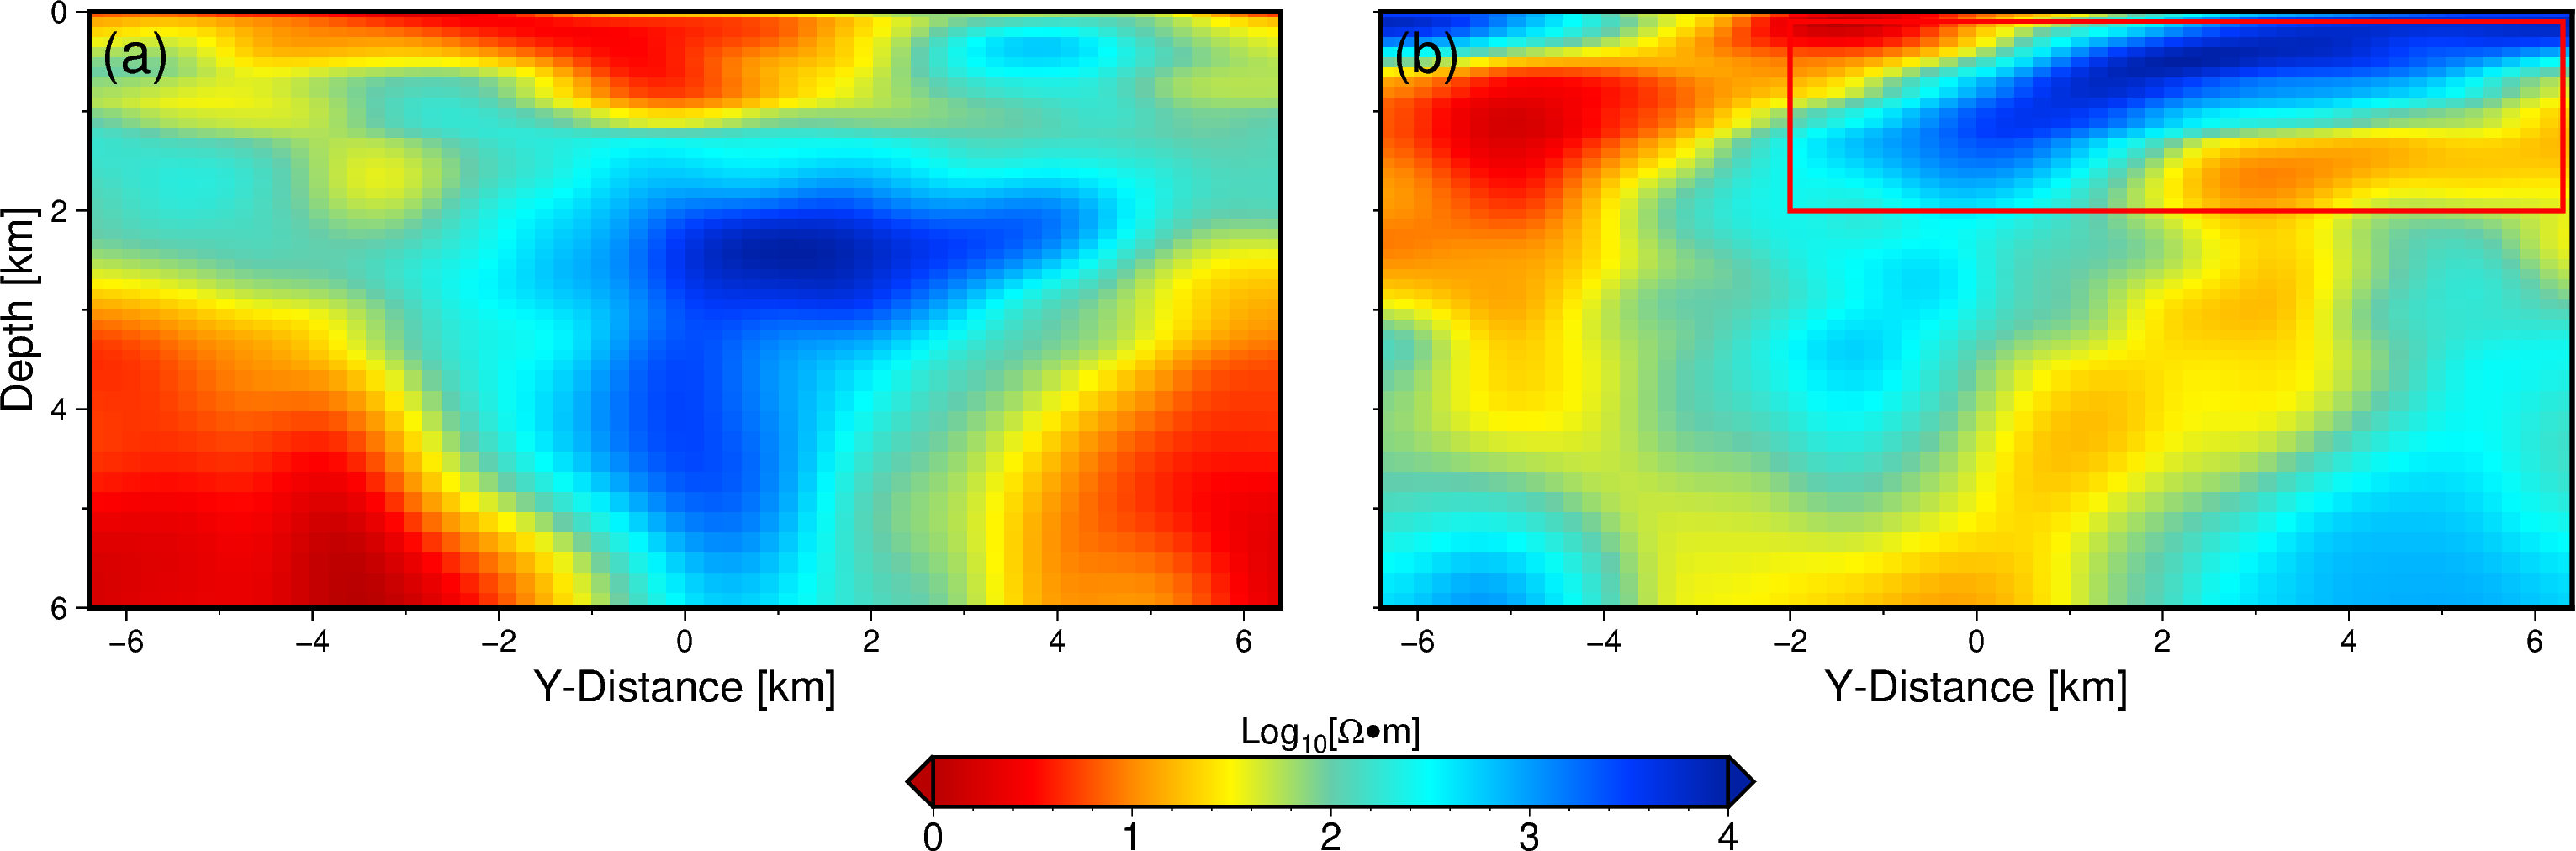

In [11]:
import pygmt

def preset():
    # Convert range units to kilometers
    ymin, ymax, zmin, zmax = -6.4, 6.4, 0, 6  # Again, assuming these values are already in kilometers
    return ymin, ymax, zmin, zmax

# Set file and directory paths
dir_path = "./Figure11/"
cpt_file_in = f"{dir_path}thermal.cpt"
cpt_file_out = f"{dir_path}rbow.cpt"
result1_grid = f"{dir_path}result1.grd"
result2_grid = f"{dir_path}result2.grd"
out_pdf_png = f"{dir_path}Figure11_py"

# Set range by calling functions
ymin, ymax, zmin, zmax = preset()
range_yz1 = f"{ymin}/{ymax}/{zmin}/{zmax}"

pygmt.config(FONT_ANNOT_PRIMARY="12p", FONT_LABEL="12p", MAP_FRAME_PEN="1.5p,black")

fig = pygmt.Figure()
pygmt.makecpt(cmap=cpt_file_in, series="0/4.0/0.01", continuous=True, output=cpt_file_out)

# Convert grid range using grdedit in original GMT, currently, PyGMT does not support grdedit and grdconvert modules
# gmt grdedit model_1.grd -R-6.4/6.4/0/6 -Gresult1.grd

fig.grdimage(grid=result1_grid, region=range_yz1, projection="X12c/-6c", cmap=cpt_file_out, frame=["xa2f1+lY-Distance [km]", "yaf+lDepth [km]", "WStr"])
fig.text(x=-5.9, y=0.4, text="(a)", font="16p,Helvetica")

ymin, ymax, zmin, zmax = preset()
range_yz2 = f"{ymin}/{ymax}/{zmin}/{zmax}"

# Convert grid range using grdedit in original GMT, currently, PyGMT does not support grdedit and grdconvert modules
# gmt grdedit model_1.grd -R-6.4/6.4/0/6 -Gresult2.grd

fig.shift_origin(xshift="13c")
fig.grdimage(grid=result2_grid, region=range_yz2, projection="X12c/-6c", cmap=cpt_file_out, frame=["xa2f1+lY-Distance [km]", "yf1", "WStr"])
fig.plot(data=[[-2.0, 0.1], [-2.0, 2.0], [6.3, 2.0], [6.3, 0.1], [-2.0, 0.1]], pen="1.3p,red")
fig.text(x=-5.9, y=0.4, text="(b)", font="16p,Helvetica")

pygmt.config(FONT_ANNOT_PRIMARY="15p", FONT_LABEL="14p")
fig.colorbar(cmap=cpt_file_out, frame=["xaf+lLog@-10@-[@~W\267@~m]", "y"], position="jTC+w8c/0.5c+o-6.5c/7.5c+ml+e")

# Save in PDF and PNG formats
fig.savefig(f"{out_pdf_png}.pdf")
fig.savefig(f"{out_pdf_png}.png")

# Display the figure in jupyter notebook
fig.show()


# Figure 12 

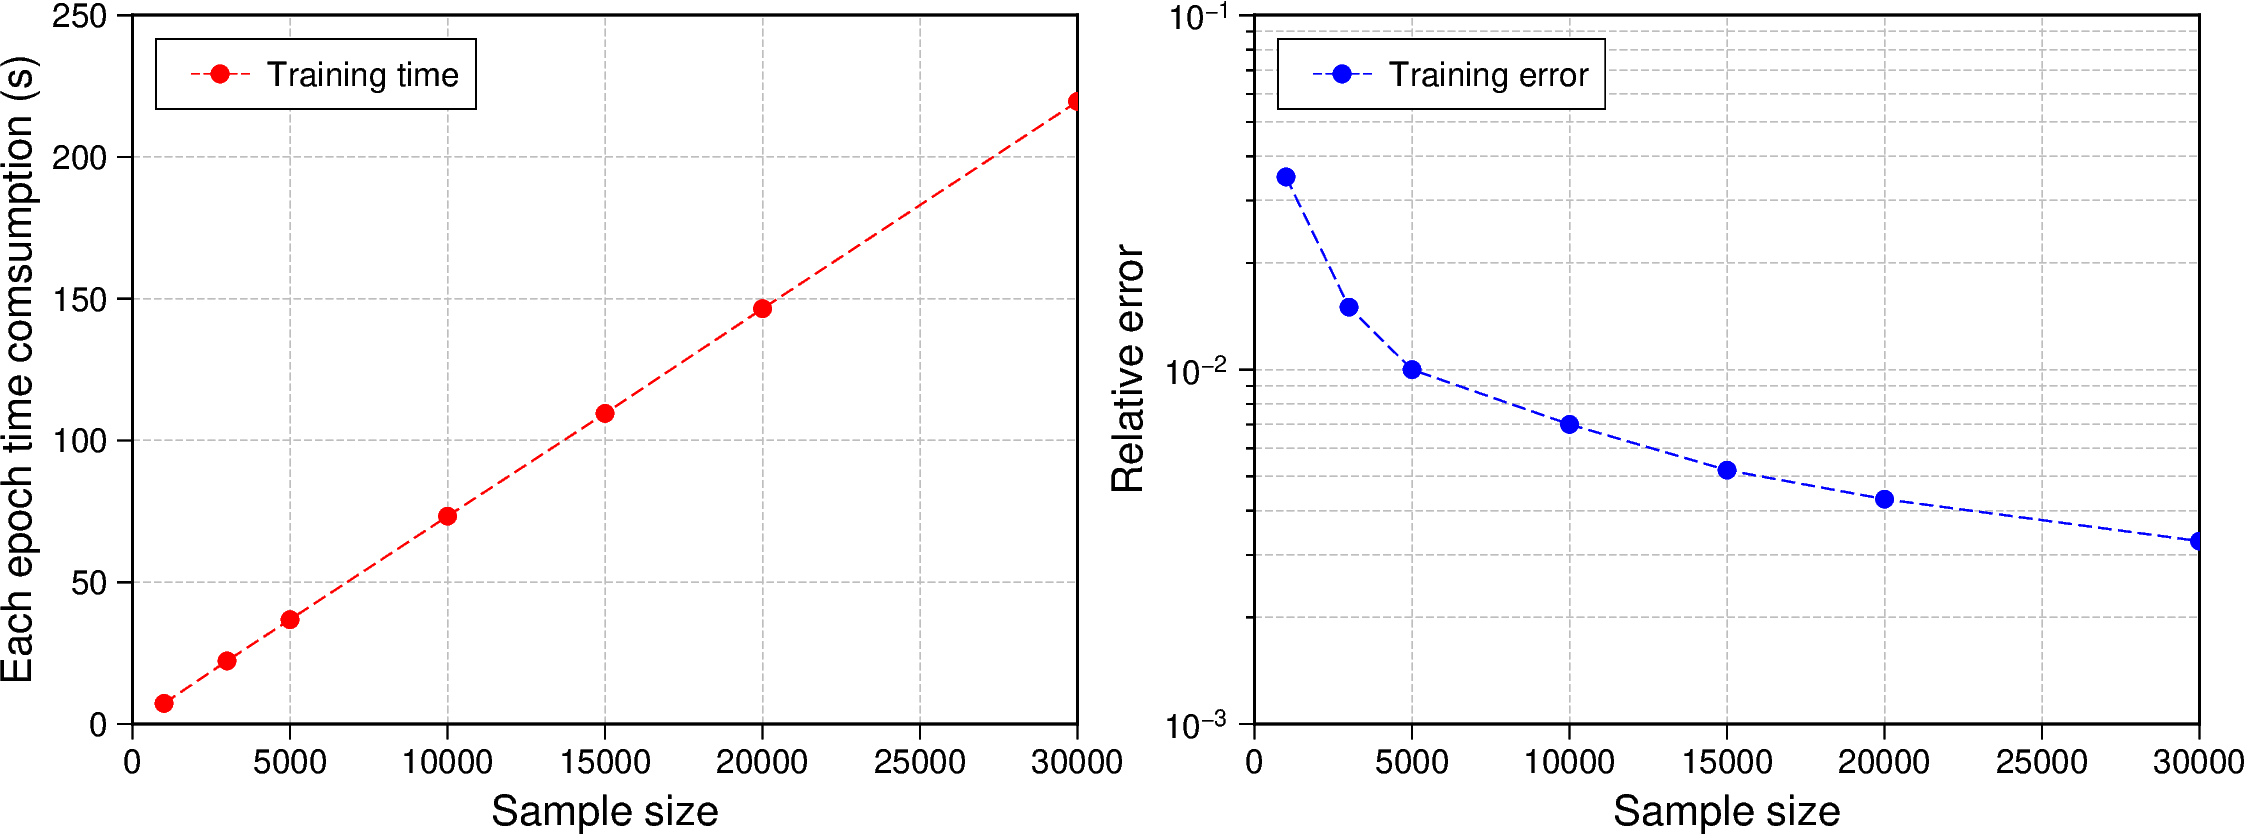

In [12]:
import pygmt
import os

# Set file and directory paths
dir_path = "./Figure12/"
out_pdf_png = f"{dir_path}Figure12_py"
legend_file_path = f"{dir_path}legend.txt"

fig = pygmt.Figure()

# training time
pygmt.config(FONT_ANNOT_PRIMARY="8p", FONT_LABEL="10p", MAP_FRAME_PEN="0.6p", MAP_GRID_PEN="0p,gray,-")
fig.basemap(region=[0, 30000, 0, 250], projection="X8c/6c", frame=["xa5000g5000+lSample size", "ya50g50+lEach epoch time comsumption (s)", "WStr"])

fig.plot(data=f"{dir_path}time.txt", pen="0.4p,red,-")
fig.plot(data=f"{dir_path}time.txt", style="c0.15c", pen="0.2p,red", fill="red")

# legend content
legend_content = """
S 0.4c c 0.15c red 0.25p,red 0.8c Training time
G -1l
S 0.4c - 0.5c red 0.25p,red,-- 
"""
# write legend content to a text file in the specified directory
with open(legend_file_path, "w") as file:
    file.write(legend_content)
fig.legend(spec=legend_file_path, position="JTL+jTL+o0.2c/0.2c", box="+p0.3,black+gwhite")


# test error
fig.shift_origin(xshift="9.5c")
pygmt.config(FONT_ANNOT_PRIMARY="8p", FONT_LABEL="10p", MAP_FRAME_PEN="0.6p", MAP_GRID_PEN="0p,gray,-")
pygmt.config(FORMAT_FLOAT_OUT='e')
fig.basemap(region=[0, 30000, 0.001, 0.1], projection="X8c/6cl", frame=["xa5000g5000+lSample size", "ya0.1f3g3p+lRelative error", "WStr"])

fig.plot(data=f"{dir_path}error.txt", pen="0.4p,Blue,-")
fig.plot(data=f"{dir_path}error.txt", style="c0.15c", pen="0.2p,Blue", fill="blue")

# legend content
legend_content = """
S 0.4c c 0.15c Blue 0.25p,Blue 0.8c Training error
G -1l
S 0.4c - 0.5c Blue 0.25p,Blue,-- 
"""
# write legend content to a text file in the specified directory
with open(legend_file_path, "w") as file:
    file.write(legend_content)
fig.legend(spec=legend_file_path, position="JTL+jTL+o0.2c/0.2c", box="+p0.3,black+gwhite")

os.remove(legend_file_path)

# Save the figure to a PDF and PNG file
fig.savefig(f"{out_pdf_png}.png")
fig.savefig(f"{out_pdf_png}.pdf")

# Display the figure in jupyter notebook
fig.show()